# Mars Exploration Program
<hr/>
<font color="green" size=4>Scrape and Analyze Mars Weather Data</font>
<hr/>

In [1]:
# dependencies and setup
from python_package.helpers import *  #liberaries and functions
from python_package.constants import * # constants
from python_package.classes import Statistics, GoogleSearch # import statistics class 

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

In [2]:
# opening browser
browser = Browser(BROWSER)

In [3]:
# visit the website
browser.visit(MARS_TEMP_URL)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.</br>
Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# create a Beautiful Soup object
data_soup = soup(html ,PROCESSING_TOOL)

In [5]:
# extract all the text elements
mars_table        = data_soup.find("table", attrs={"table"})
mars_header_data  = mars_table.tbody.find("tr")
mars_row_data     = mars_table.tbody.find_all("tr" ,class_="data-row")

In [6]:
# header text elements
mars_header_data

<tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>

In [7]:
# row text elements
mars_row_data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# list of the column names
header_row      = [columns.text for columns in mars_header_data.find_all("th")]
# list of rows
table_value     = [[columns.text for columns in td.find_all("td")] for td in mars_row_data]
# create a pandas DataFrame by using the list of rows and a list of the column names
mars_mission_df = pd.DataFrame(table_value,columns=header_row)
# confirm DataFrame was created successfully
mars_mission_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# examine data type of each column
mars_mission_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# change data types for data analysis
mars_mission_df["terrestrial_date"] =  pd.to_datetime(mars_mission_df["terrestrial_date"])
mars_mission_df=mars_mission_df.astype({"id": "int32",
                                        "sol":"int32",
                                        "ls":"int32",
                                        "month":"int32",
                                        "min_temp":"float",
                                        "pressure":"float",
                                        })

In [11]:
# confirm type changes were successful by examining data types again
mars_mission_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. how many months are there on mars?
# list of month on mars
mars_month       = sorted(mars_mission_df["month"].unique().tolist())
print(f"""List of Month on Mars: {mars_month}""")
# number of month in mars year:
mars_month_count = len(mars_month)
print(f"""Number of Month in Mars Year: {mars_month_count}""")
# data collecting total number of month on mars
total_month=1
for counter, value in enumerate(mars_mission_df["month"]):
    if counter > 0 and value!=mars_mission_df["month"][counter-1]:
        total_month +=1
print(f"""Data Collecting Total Number of Month on Mars: {total_month}""")

List of Month on Mars: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Number of Month in Mars Year: 12
Data Collecting Total Number of Month on Mars: 36


In [13]:
# 2. mow many martian days' worth of data are there?
martian_days = len(sorted(mars_mission_df["sol"].unique().tolist()))
print(f"""Number of Martian days: {martian_days}""")

Number of Martian days: 1867


In [14]:
# 3. What is the average low temperature by month?
# define class (/code/python_package/classes "Statistics class")
min_temp=Statistics(mars_mission_df,"min_temp")
# calculation (mean, median, variance, standard deviation, standard error) for temprature
min_temp.set_stats()
# result in dataframe
min_temp.get_stats()

min_temp                                      
            mean median        var       std       sem
month                                                 
3     -83.307292  -84.0   8.391988  2.896893  0.209065
4     -82.747423  -83.0  10.438465  3.230861  0.231962
2     -79.932584  -80.0   4.628198  2.151325  0.161249
5     -79.308725  -79.0   5.620261  2.370709  0.194216
1     -77.160920  -77.0   5.130025  2.264956  0.171706
6     -75.299320  -75.0   3.444041  1.855813  0.153065
12    -74.451807  -74.0   4.418876  2.102112  0.163156
7     -72.281690  -72.0   5.551294  2.356118  0.197721
11    -71.985507  -72.0   5.474241  2.339710  0.199169
10    -71.982143  -72.0   5.495174  2.344179  0.221504
9     -69.171642  -69.0  10.323701  3.213052  0.277565
8     -68.382979  -68.0   7.552280  2.748141  0.231435

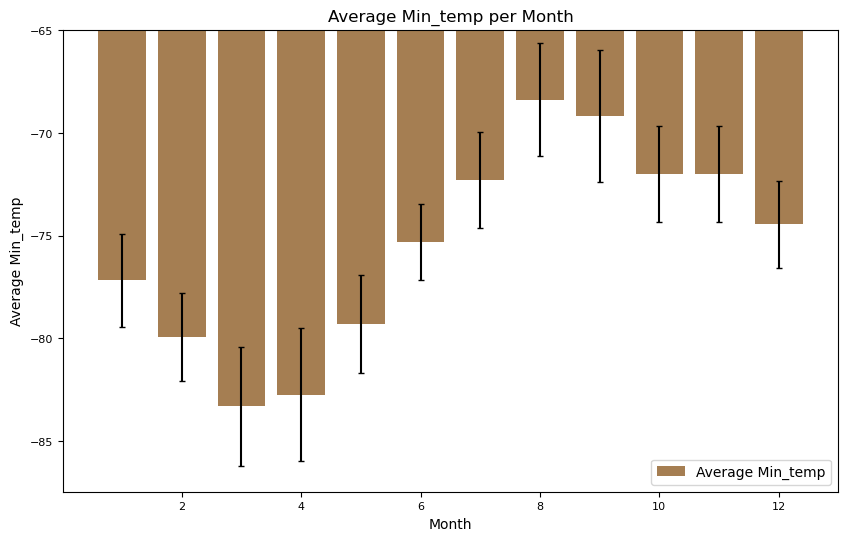

In [15]:
# plot the average temperature by month
min_temp.set_plot("mean","std")

In [16]:
# identify the coldest and hottest months in Curiosity's location
min_temp.get_month_value()

Month with Lowest Value: 3
Month with Highest Value: 8


On average, the <b>third month</b> has the <ins>coldest</ins> minimum temperature on Mars, and the <b>eighth</b> month is the <ins>warmest</ins>. But it is always very cold there in human terms!


In [17]:
# 4. average pressure by martian month
# define class (/code/python_package/classes "Statistics class")
pressure=Statistics(mars_mission_df,"pressure")
# calculation (mean, median, variance, standard deviation, standard error) for pressure
pressure.set_stats()
# result in dataframe
pressure.get_stats()

pressure                                        
             mean median         var        std       sem
month                                                    
6      745.054422  743.0   59.791539   7.732499  0.637766
5      748.557047  747.0  160.748413  12.678660  1.038676
7      795.105634  793.0  425.300819  20.622823  1.730629
4      806.329897  806.0  653.683350  25.567232  1.835620
12     842.156627  843.0   50.569259   7.111207  0.551937
11     857.014493  856.0  118.890299  10.903683  0.928183
1      862.488506  862.0  171.950734  13.112999  0.994094
8      873.829787  877.0  542.256535  23.286402  1.961069
3      877.322917  878.0  321.287849  17.924504  1.293590
10     887.312500  886.5  138.126689  11.752731  1.110529
2      889.455056  890.0  120.045991  10.956550  0.821228
9      913.305970  914.0   50.755302   7.124276  0.615444

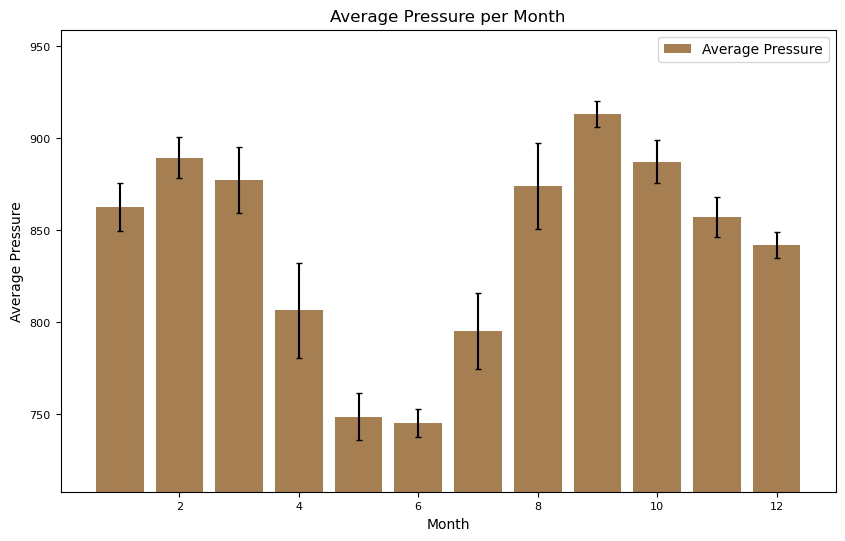

In [18]:
# Plot the average pressure by month
pressure.set_plot("mean","std")

In [19]:
# identify the lowest and highest (pressure) months in Curiosity's location
pressure.get_month_value()

Month with Lowest Value: 6
Month with Highest Value: 9


Atmospheric pressure is, on average, <b>lowest</b> in the <ins>sixth</ins> month and <b>highest</b> in the <ins>ninth</ins>.

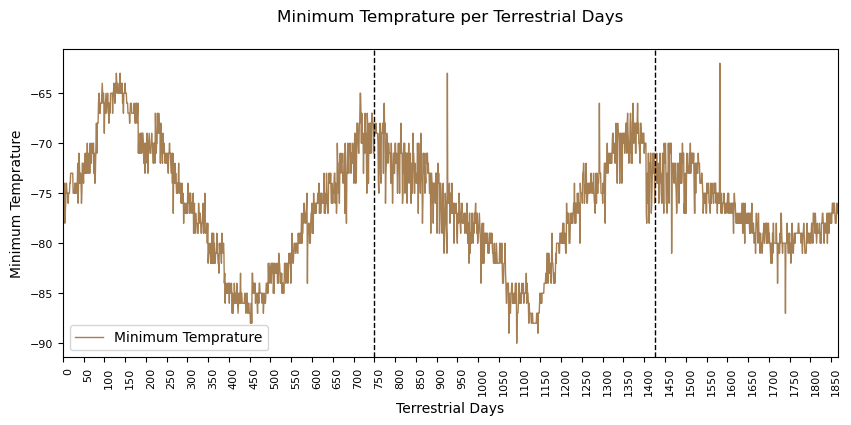

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
simple_line(mars_mission_df,["min_temp"],["Terrestrial Days","Minimum Temprature"],["v",750,1425])

In [21]:
# define class (/code/python_package/classes "GoogleSearch class") for finding mars year equivalent earth days. 
mars_earth_day=GoogleSearch("how long is a year on mars")
mars_earth_day.set_search()
mars_earth_day.get_search()
mars_earth_day.find_result("div","Z0LcW t2b5Cf")

687 days


The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

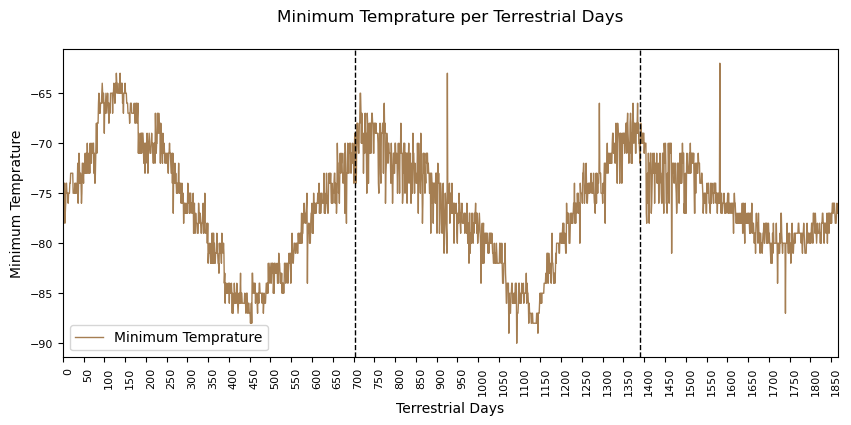

In [22]:
# firm estimation
simple_line(mars_mission_df,["min_temp"],["Terrestrial Days","Minimum Temprature"],["v",703,1390])

In [23]:
first_line_date=mars_mission_df.loc[mars_mission_df.index==703]["terrestrial_date"].values
second_line_date=mars_mission_df.loc[mars_mission_df.index==1390]["terrestrial_date"].values
print(f"""First Date: {first_line_date},Second Date: {second_line_date}""")

First Date: ['2014-10-19T00:00:00.000000000'],Second Date: ['2016-10-21T00:00:00.000000000']


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [24]:
# Write the data to a CSV
# min_temp
min_temp.save_stats()
# pressure
pressure.save_stats()

In [25]:
browser.quit()